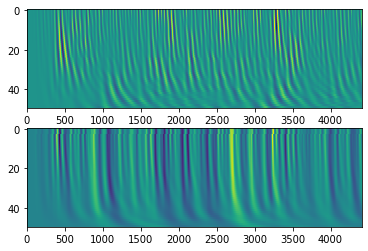

In [13]:
from brian2 import *
from brian2hears import *

%matplotlib inline


sound = whitenoise(100*ms).ramp()
sound.level = 50*dB

### example of a bank of bandpass filter ################
nchannels = 50
center_frequencies = linspace(200*Hz, 1000*Hz, nchannels)  #center frequencies
bw = linspace(50*Hz, 300*Hz, nchannels)  #bandwidth of the filters
# The maximum loss in the passband in dB. Can be a scalar or an array of length
# nchannels
gpass = 1.*dB
# The minimum attenuation in the stopband in dB. Can be a scalar or an array
# of length nchannels
gstop = 10.*dB
#arrays of shape (2 x nchannels) defining the passband frequencies (Hz)
passband = vstack((center_frequencies-bw/2, center_frequencies+bw/2))
#arrays of shape (2 x nchannels) defining the stopband frequencies (Hz)
stopband = vstack((center_frequencies-1.1*bw, center_frequencies+1.1*bw))

filterbank = IIRFilterbank(sound, nchannels, passband, stopband, gpass, gstop,
                           'bandstop', 'cheby1')
filterbank_mon = filterbank.process()

figure()
subplot(211)
imshow(flipud(filterbank_mon.T), aspect='auto')

#### example of a bank of lowpass filter ################
nchannels = 50
cutoff_frequencies = linspace(100*Hz, 1000*Hz, nchannels)
#bandwidth of the transition region between the en of the pass band and the
#begin of the stop band
width_transition = linspace(50*Hz, 300*Hz, nchannels)
# The maximum loss in the passband in dB. Can be a scalar or an array of length
# nchannels
gpass = 1*dB
# The minimum attenuation in the stopband in dB. Can be a scalar or an array of
# length nchannels
gstop = 10*dB
passband = cutoff_frequencies-width_transition/2
stopband = cutoff_frequencies+width_transition/2

filterbank = IIRFilterbank(sound, nchannels, passband, stopband, gpass, gstop,
                           'low','cheby1')
filterbank_mon=filterbank.process()

subplot(212)
imshow(flipud(filterbank_mon.T), aspect='auto')
show()

In [43]:
from brian2 import *
from brian2hears import *

sound = loadsound('audio/modified/Cn1.wav')
sound = sound.ramp()
cf = erbspace(125*Hz, 7.25*kHz, 19)
gammatone = Gammatone(sound, cf)
cochlea = FunctionFilterbank(gammatone, lambda x: clip(x, 0, Inf)**(1.0/3.0)) # 不知道；
lowpass = LowPass(cochlea, 10*Hz)
output = lowpass.process()

In [35]:
sound = sound.ramp()
cf = erbspace(125*Hz, 8*kHz, 19)
gammatone = Gammatone(sound, cf)
cochlea = FunctionFilterbank(gammatone, lambda x: clip(x, 0, Inf)**(1.0/3.0))
lowpass = LowPass(cochlea, 10*Hz)
output = cochlea.process()
# imshow(output.T, origin='lower left', aspect='auto', vmin=0)
# show()

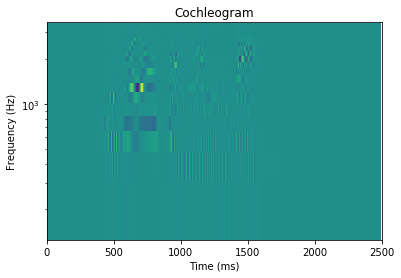

In [54]:
from brian2 import *
from brian2hears import *
from matplotlib import pyplot

sound = loadsound('audio/modified/Cn1.wav')
nbr_center_frequencies = 19
b1 = 1.019  #factor determining the time constant of the filters
#center frequencies with a spacing following an ERB scale
center_frequencies = erbspace(125*Hz, 3500*Hz, nbr_center_frequencies)
gammatone = Gammatone(sound, center_frequencies, b=b1)

gt_mon = gammatone.process()

figure()
imshow(gt_mon.T, aspect='auto', origin='lower left',
       extent=(0, sound.duration/ms,
               center_frequencies[0]/Hz, center_frequencies[-1]/Hz))
pyplot.yscale('log')
title('Cochleogram')
ylabel('Frequency (Hz)')
xlabel('Time (ms)')

show()

AttributeError: 'numpy.ndarray' object has no attribute 'type'